## Content
1. Stock Winning Streaks
2. Download daily stock price data


### 1. Stock Winning Streaks.  
python version of `stock_winning_streaks.R`

In [1]:
!python --version

Python 3.9.16


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

In [3]:
print(f"pandas version: {pd.__version__}")

pandas version: 1.4.4


In [ ]:
# read in data
uploaded = files.upload()

Saving mcd_stock_price.csv to mcd_stock_price.csv


In [ ]:
# check uploaded file
print(f"mcd_stock_price.csv sample: {uploaded['train.csv'][0:10]}")

In [ ]:
# check file
print(f"mcd_stock_price.csv sample: {uploaded['mcd_stock_price.csv'][0:10]}")

mcd_stock_price.csv sample: b'"";"symbol'


In [ ]:
df = pd.read_csv("mcd_stock_price.csv", sep=";")
df = df.drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(2726, 8)


,symbol,date,open,high,low,close,volume,adjusted
0,MCD,2012-01-03,"101,330002","101,589996","98,75","98,839996",8895900,"73,221718"
1,MCD,2012-01-04,"99,110001","100,300003","98,760002","99,389999",6754700,"73,62915"
2,MCD,2012-01-05,"99,470001","100,400002","98,68","99,830002",8163800,"73,955116"
3,MCD,2012-01-06,"100,089996","100,769997","99,870003","100,599998",6775300,"74,525528"
4,MCD,2012-01-09,"100,879997","100,93","99,510002","99,639999",4433700,"73,814354"


In [ ]:
df = df.replace(',','.', regex=True)
df.head()

,symbol,date,open,high,low,close,volume,adjusted
0,MCD,2012-01-03,101.330002,101.589996,98.75,98.839996,8895900,73.221718
1,MCD,2012-01-04,99.110001,100.300003,98.760002,99.389999,6754700,73.62915
2,MCD,2012-01-05,99.470001,100.400002,98.68,99.830002,8163800,73.955116
3,MCD,2012-01-06,100.089996,100.769997,99.870003,100.599998,6775300,74.525528
4,MCD,2012-01-09,100.879997,100.93,99.510002,99.639999,4433700,73.814354


In [ ]:
# change to numeric
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
df['adjusted'] = pd.to_numeric(df['adjusted'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726 entries, 0 to 2725
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   symbol    2726 non-null   object 
 1   date      2726 non-null   object 
 2   open      2726 non-null   float64
 3   high      2726 non-null   float64
 4   low       2726 non-null   float64
 5   close     2726 non-null   float64
 6   volume    2726 non-null   float64
 7   adjusted  2726 non-null   float64
dtypes: float64(6), object(2)
memory usage: 170.5+ KB


In [ ]:
df['up'] = df['close'].diff().fillna(0) > 0

s = df['up']

df['streak'] = (s
                 .mul(s.cumsum())
                 .diff()
                 .where(lambda x: x <0)
                 .ffill()
                 .add(s.cumsum(), fill_value=0))

df.head(10)

,symbol,date,open,high,low,close,volume,adjusted,up,streak
0,MCD,2012-01-03,101.330002,101.589996,98.750000,98.839996,8895900.0,73.221718,False,0.0
1,MCD,2012-01-04,99.110001,100.300003,98.760002,99.389999,6754700.0,73.629150,True,1.0
2,MCD,2012-01-05,99.470001,100.400002,98.680000,99.830002,8163800.0,73.955116,True,2.0
3,MCD,2012-01-06,100.089996,100.769997,99.870003,100.599998,6775300.0,74.525528,True,3.0
4,MCD,2012-01-09,100.879997,100.930000,99.510002,99.639999,4433700.0,73.814354,False,0.0
5,MCD,2012-01-10,100.239998,100.449997,99.349998,99.699997,5075400.0,73.858818,True,1.0
6,MCD,2012-01-11,99.620003,100.110001,99.349998,99.930000,4622500.0,74.029198,True,2.0
7,MCD,2012-01-12,100.370003,100.650002,100.070000,100.570000,4022700.0,74.503319,True,3.0
8,MCD,2012-01-13,100.180000,100.430000,99.610001,100.349998,4134800.0,74.340355,False,0.0
9,MCD,2012-01-17,100.589996,101.199997,100.050003,100.550003,4555800.0,74.488495,True,1.0


Now we plot the probability distribution of conesecutive days of increasing share price.

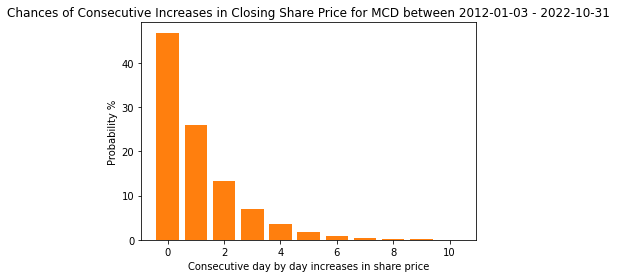

In [ ]:
# bar plot of the data
plt.close()

streak_counts=(df
                  ['streak']
                  .value_counts(normalize=True)
                  .mul(100)
                  .round(1)
                  )
stock_name = df["symbol"][0]
min_date = df.loc[df.index[0], "date"]
max_date = df.loc[df.index[-1], "date"]

x = streak_counts.index
y = streak_counts.values

fig, ax = plt.subplots()
bar_obj = ax.bar(x=x, height=y)

_ = plt.bar(x, height=y)
_ = plt.xlabel("Consecutive day by day increases in share price")
_ = plt.ylabel("Probability %")
_ = plt.title(f"Chances of Consecutive Increases in Closing Share Price for {stock_name} between {min_date} - {max_date}")

### 2. Download daily stock price data  
  
python version of `stock_picker.Rmd`

In [4]:
import pandas as pd
import yfinance as yf

In [ ]:
# Downloads the OMX index value
start_date = '2022-01-01'
end_date = '2023-03-24'
omx30 = '^OMX'

data = yf.download(omx30, start=start_date, end=end_date)
data = data.reset_index()
data = data[['Date', 'Close']]
data.columns = ['date', 'close']
data['stock_name'] = omx30
data = data[['stock_name', 'date', 'close']]

data.head()

[*********************100%***********************]  1 of 1 completed


,stock_name,date,close
0,^OMX,2022-01-03,2444.189941
1,^OMX,2022-01-04,2456.169922
2,^OMX,2022-01-05,2442.810059
3,^OMX,2022-01-07,2400.949951
4,^OMX,2022-01-10,2352.729980


In [5]:
# Download stock data for each stock of the omxs30 index 

start_date = '2019-01-01'
end_date = '2023-03-24'
# hard coded stocks in a list that is included in the omxs30 index
omxs30_stocks = ['SCA-B.ST', 'ERIC-B.ST', 'EVO.ST', 'SEB-A.ST', 'ESSITY-B.ST', 'INVE-B.ST', 'ALIV-SDB.ST', 'BOL.ST', 'SWED-A.ST',
                 'HEXA-B.ST', 'AZN.ST', 'TEL2-B.ST', 'GETI-B.ST', 'ELUX-B.ST', 'SHB-A.ST', 'HM-B.ST', 'TELIA.ST', 'ABB.ST', 'VOLV-B.ST',
                 'SAND.ST', 'KINV-B.ST', 'ALFA.ST', 'ASSA-B.ST', 'SKF-B.ST', 'SBB-B.ST', 'ATCO-B.ST', 'SINCH.ST', 'ATCO-A.ST', 'NDA-SE.ST']

# target df
df = pd.DataFrame(columns=['stock_name', 'date', 'close'])

for stock in omxs30_stocks:
    print(stock)
    stock_data = yf.download(stock, start=start_date, end=end_date)
    stock_data = stock_data.reset_index()
    stock_data = stock_data[['Date', 'Close']].copy()
    stock_data.columns = ['date', 'close']
    stock_data['stock_name'] = stock
    # add moving averages
    stock_data['ma50'] = stock_data['close'].rolling(window=50).mean()
    stock_data['ma200'] = stock_data['close'].rolling(window=200).mean()
    stock_data = stock_data[['stock_name', 'date', 'close', 'ma50', 'ma200']]
    df = pd.concat([df, stock_data])

df.head()

SCA-B.ST
[*********************100%***********************]  1 of 1 completed
ERIC-B.ST
[*********************100%***********************]  1 of 1 completed
EVO.ST
[*********************100%***********************]  1 of 1 completed
SEB-A.ST
[*********************100%***********************]  1 of 1 completed
ESSITY-B.ST
[*********************100%***********************]  1 of 1 completed
INVE-B.ST
[*********************100%***********************]  1 of 1 completed
ALIV-SDB.ST
[*********************100%***********************]  1 of 1 completed
BOL.ST
[*********************100%***********************]  1 of 1 completed
SWED-A.ST
[*********************100%***********************]  1 of 1 completed
HEXA-B.ST
[*********************100%***********************]  1 of 1 completed
AZN.ST
[*********************100%***********************]  1 of 1 completed
TEL2-B.ST
[*********************100%***********************]  1 of 1 completed
GETI-B.ST
[*********************100%***********************

,stock_name,date,close,ma50,ma200
0,SCA-B.ST,2019-01-02,68.980003,NaN,NaN
1,SCA-B.ST,2019-01-03,66.839996,NaN,NaN
2,SCA-B.ST,2019-01-04,69.599998,NaN,NaN
3,SCA-B.ST,2019-01-07,69.800003,NaN,NaN
4,SCA-B.ST,2019-01-08,70.620003,NaN,NaN


In [6]:
# Unit test

import unittest
import pandas as pd

class TestStockData(unittest.TestCase):
    def test_data_frame(self):
        # Test that the data frame has the correct columns
        self.assertEqual(list(df.columns), ['stock_name', 'date', 'close', 'ma50', 'ma200'])
        
        # Test that the data frame has data for all OMXS30 stocks
        self.assertEqual(len(df['stock_name'].unique()), len(omxs30_stocks))
        
        # Test that the data frame has data for the specified date range
        self.assertTrue(df['date'].min() >= pd.to_datetime(start_date))
        self.assertTrue(df['date'].max() <= pd.to_datetime(end_date))
        
        # Test that the closing price column contains valid data
        self.assertTrue(df['close'].notnull().all())
        self.assertTrue((df['close'] > 0).all())

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.018s

OK


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   stock_name  1063 non-null   object        
 1   date        1063 non-null   datetime64[ns]
 2   close       1063 non-null   float64       
 3   ma50        1014 non-null   float64       
 4   ma200       864 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 41.6+ KB


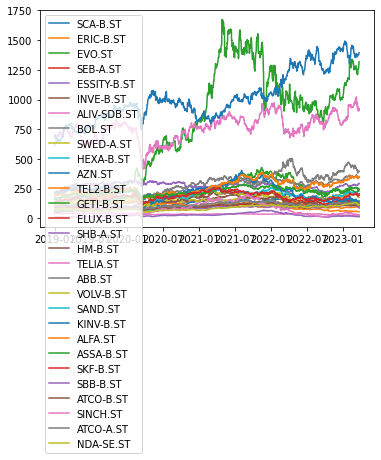

In [13]:
# Check each time series by plotting them over time
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for stock in omxs30_stocks:
    stock_data = df[df['stock_name'] == stock]
    ax.plot(stock_data['date'], stock_data['close'], label=stock)
ax.legend()
plt.show()

Above plot is not very readable. We need one plot per stock.

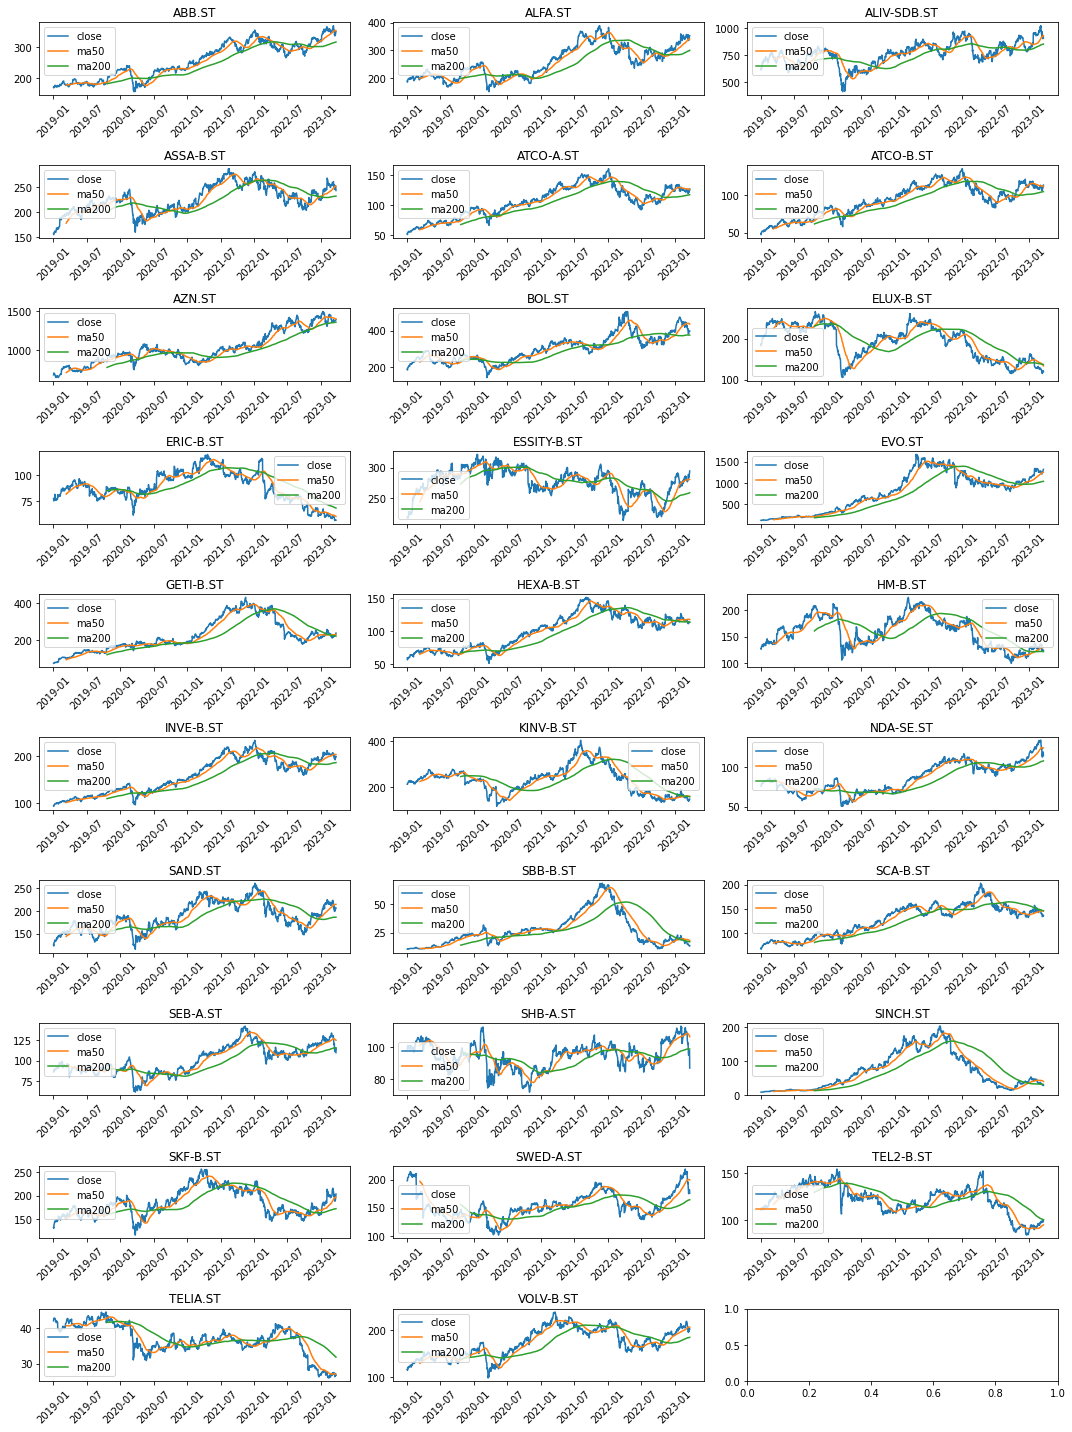

In [12]:
# Plot the sorted list of stocks in a separate plot for each stock to increase readability
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 3, figsize=(15, 20))
axs = axs.flatten()
for i, stock in enumerate(sorted(omxs30_stocks)):
    stock_data = df[df['stock_name'] == stock]
    axs[i].plot(stock_data['date'], stock_data['close'], label='close')
    axs[i].plot(stock_data['date'], stock_data['ma50'], label='ma50')
    axs[i].plot(stock_data['date'], stock_data['ma200'], label='ma200')
    axs[i].set_title(stock)
    axs[i].legend()
    # rotate x-axis ticks
    for label in axs[i].get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()

In [ ]:
# To do
# Check which stock is above dc today and store them in a separate data frame
# Plot only the above dc stocks